In [4]:
from IPython.display import HTML

# Multiclassification task on image data


Dataset: [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)

<img src="img/fashion-mnist-sprite.png">

In [5]:
HTML('<img src="img/embedding.gif">')

In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from IPython.display import SVG

from keras.models import Sequential
from keras.layers import InputLayer, Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.utils.vis_utils import model_to_dot
from keras.callbacks import CSVLogger, ModelCheckpoint
from keras.datasets import cifar10, fashion_mnist
from keras.utils import to_categorical
from keras_preprocessing.image import NumpyArrayIterator, ImageDataGenerator

np.random.seed(1234)
%matplotlib inline

## Load dataset

In [7]:
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()

## Excersize: plot the data

In [8]:
train_y.shape

(60000,)

In [9]:
to_categorical(train_y).shape

(60000, 10)

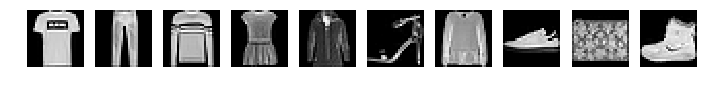

In [10]:
labels = np.unique(train_y)

plt.figure(figsize=(12, 6))

for i in labels:
    ax = plt.subplot(1, len(labels), i + 1)
    ax.axis('off')
    plt.imshow(train_X[train_y == i][0, :, :], 'gray')

## Scale data

In [11]:
train_X = train_X.astype('float32') / 255.
test_X = test_X.astype('float32') / 255.

## Split data intro train, valid and test

In [12]:
train_X, valid_X, train_y, valid_y = train_test_split(train_X, train_y, test_size=0.2, stratify=train_y)


print('#train:', len(train_X), '#valid:', len(valid_X), '#test:', len(test_X))

#train: 48000 #valid: 12000 #test: 10000


## Reshape data

In [13]:
train_X.shape

(48000, 28, 28)

In [14]:
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)
valid_X = valid_X.reshape(-1, 28, 28, 1)

## One-hot encode targets

In keras when we solve multiclassification task we apply one-hot encoding

In [15]:
train_y_one_hot = to_categorical(train_y)
test_y_one_hot = to_categorical(test_y)
valid_y_one_hot = to_categorical(valid_y)

## Excersize: solve task with a simple fully connected network (like in regression notebook)

hints:
    
    * loss = 'categorical_crossentropy'
    * metrics = ['accuracy']

## Let's learn more about conv nets

[cs231n](http://cs231n.github.io/convolutional-networks)

## 1st cnn

In [16]:
model = Sequential()

# Must define the input shape in the first layer of the neural network
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28, 28, 1))) 
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               3211520   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 3,214,410
Trainable params: 3,214,410
Non-trainable params: 0
_________________________________________________________________


## Plot the model

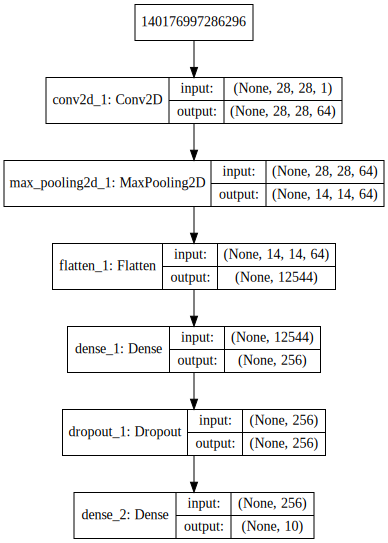

In [17]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
!rm -rf /tmp/checkpoints
!mkdir /tmp/checkpoints

checkpointer = ModelCheckpoint('/tmp/checkpoints/weights.{epoch:02d}-{val_loss:.2f}.hdf5')

history = model.fit(train_X, train_y_one_hot,
                    batch_size=64,
                    epochs=10,
                    validation_data=(valid_X, valid_y_one_hot),
                    callbacks=[checkpointer])

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 5s 111us/step - loss: 0.4939 - acc: 0.8254 - val_loss: 0.3131 - val_acc: 0.8858
Epoch 2/10
48000/48000 [==============================] - 4s 84us/step - loss: 0.3331 - acc: 0.8812 - val_loss: 0.2743 - val_acc: 0.8990
Epoch 3/10
48000/48000 [==============================] - 4s 87us/step - loss: 0.2912 - acc: 0.8936 - val_loss: 0.2576 - val_acc: 0.9032
Epoch 4/10
48000/48000 [==============================] - 4s 84us/step - loss: 0.2653 - acc: 0.9051 - val_loss: 0.2447 - val_acc: 0.9103
Epoch 5/10
48000/48000 [==============================] - 4s 84us/step - loss: 0.2473 - acc: 0.9096 - val_loss: 0.2470 - val_acc: 0.9062
Epoch 6/10
48000/48000 [==============================] - 4s 84us/step - loss: 0.2266 - acc: 0.9175 - val_loss: 0.2418 - val_acc: 0.9136
Epoch 7/10
48000/48000 [==============================] - 4s 84us/step - loss: 0.2118 - acc: 0.9204 - val_loss: 0.2327 - val_ac

## Excersize: plot learning curves and choose the best epoch

## Excersize: change model structure (add more conv->max_pool blocks)

[how to do it](http://cs231n.github.io/convolutional-networks/#layerpat)